In [1]:
#here we define an array of stock tickers that will be fed into our program.
#change these tickers as desired
portfolio = ["ZIM", "T", "MOS", "VALE", "ENB", "ADM" ]

#what period do you want to evaluate?
# use "period" instead of start/end
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# (optional, default is '1mo')
per = "1y"

In [2]:
#this block is to point jupyter to our custom libraries
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('/libs'))
sys.path.insert(0, module_path)

import pandas as pd, matplotlib.pyplot as plt

#custom libraries
import libs.collector as collector
import libs.indicators as indicators
#import libs.dbloader as dbloader

#general note on running notebooks: if you get an "undefined" type error, remember that you have to 
#run each of the cells in order sequentially first in order to "define" the variables
#and execute the commands. so if you get the "undefined" error, go back up and make sure you 
#have run all the lines that came before your troublesome line of code


In [4]:
#pull the stock information from yfinance
stocks = collector.get_yfinance_stocks(portfolio,per)

#the format of the yfinance download data has a two-tiered header - [measurement]/[ticker]
# this custom function changes it around to make it easier to work with
stocks = collector.flatten(stocks)

[*********************100%***********************]  6 of 6 completed


In [6]:
#isolate the close price for the stocks
close = stocks['Close'].copy()

#generate our moving averages with our indicator functions
ma = indicators.moving_averages(close)
ema = indicators.exp_moving_averages(close)

In [8]:
# normalize our data so we can start on the same starting point for all the stocks
# to do this, we take the close price from the first record in the time series, then we divide all of the 
# other stock close numbers by that value. from there, 
# we multiply the numbers again by 100 to get a positive number
ma = ema.div(ema.iloc[0]).mul(100)
ema = ma.div(ma.iloc[0]).mul(100)


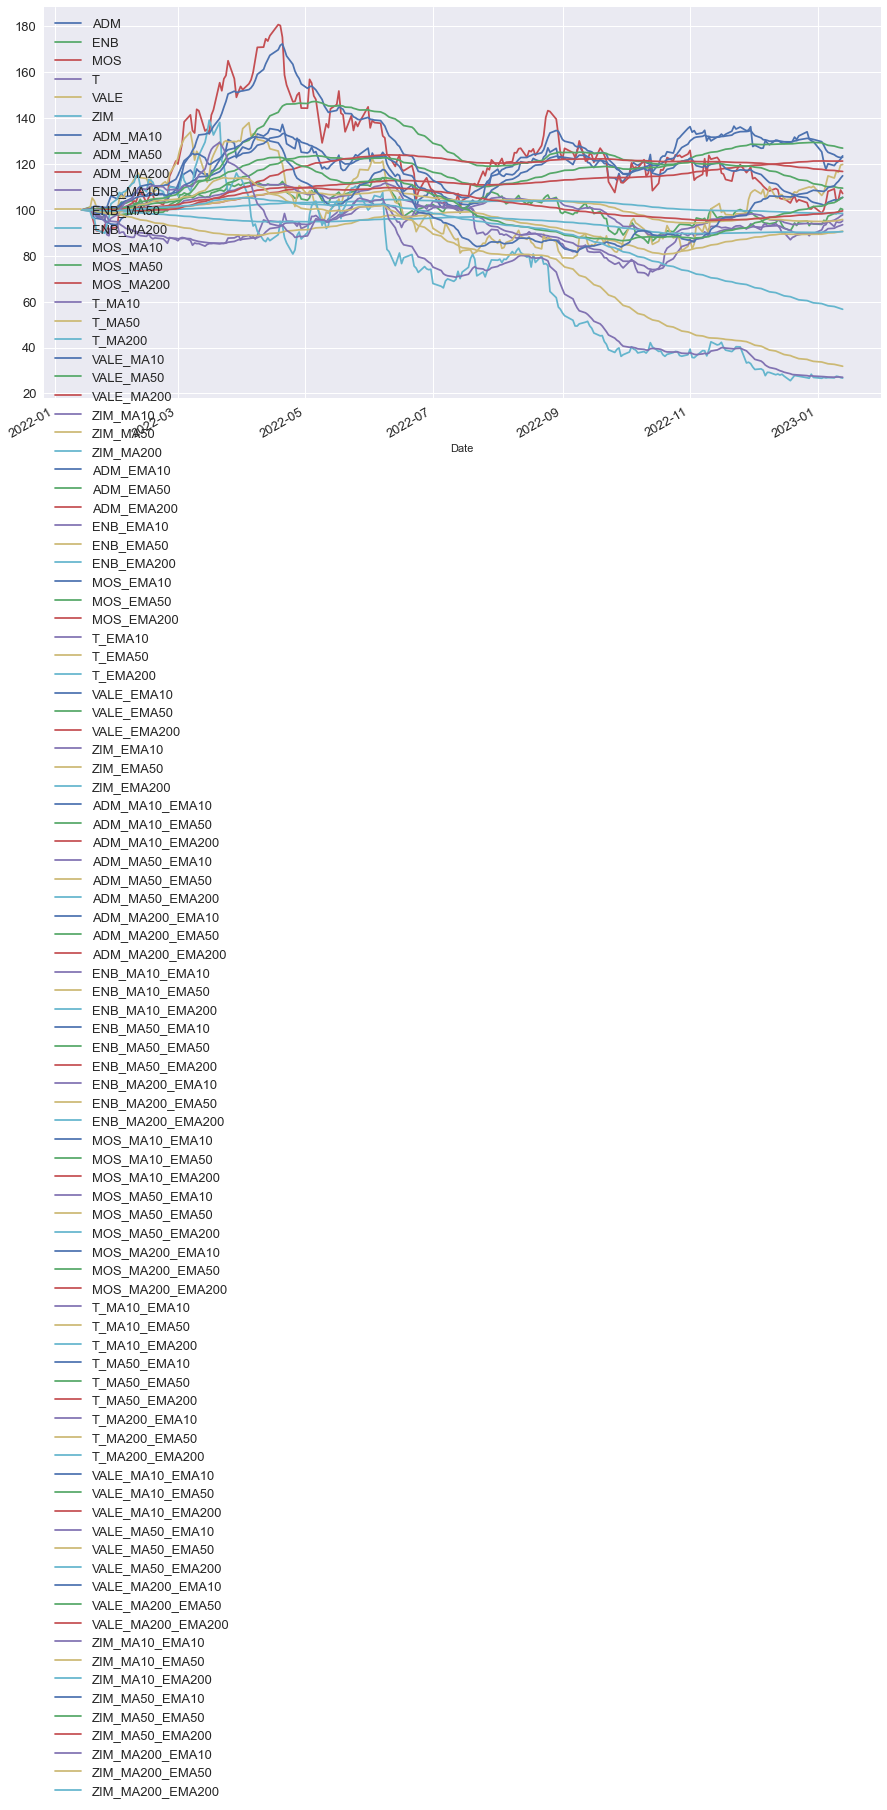

In [9]:
#Plot the data
import matplotlib.pyplot as plt
plt.style.use("seaborn")

ema.plot(figsize = (15,8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [12]:
#in order to get daily returns, use the shift() method
adm = ema.ADM.copy().to_frame()
adm["lag1"] = adm.shift(periods = 1)

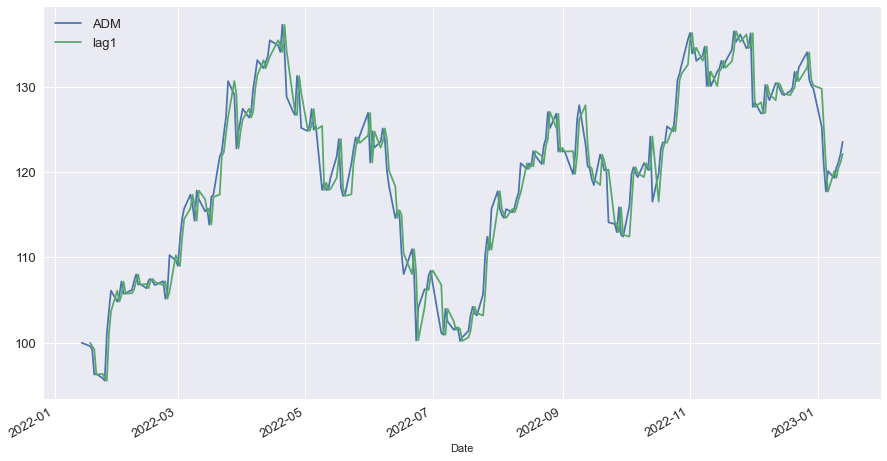

In [13]:
adm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [14]:
#or we can just use the diff and pct_change methods - which is supposed to do the same thing but....
adm["adm_chg_pct"] = ema.ADM.pct_change()

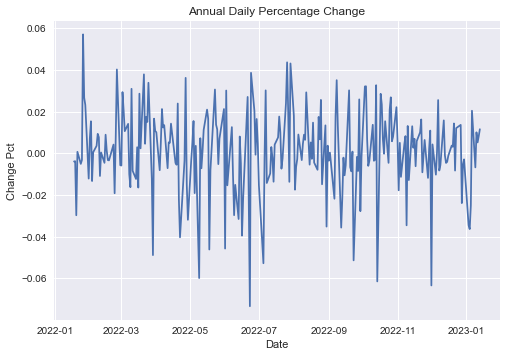

In [15]:
from importlib import reload
plt=reload(plt)

plt.plot(figsize = (100, 8 ), fontsize = 13)
plt.plot(adm["adm_chg_pct"])

plt.xlabel("Date")
plt.ylabel("Change Pct")
plt.title("Annual Daily Percentage Change")

# Display

plt.show()

In [16]:
adm.head()

,ADM,lag1,adm_chg_pct
Date,,,
2022-01-14,100.000000,NaN,NaN
2022-01-18,99.608656,100.000000,-0.003913
2022-01-19,99.231303,99.608656,-0.003788
2022-01-20,96.282315,99.231303,-0.029718
2022-01-21,96.352201,96.282315,0.000726
